In [1]:
import pandas as pd

### The advertising dataset

https://www.kaggle.com/fayomi/advertising

In [54]:
advertising_data = pd.read_csv("datasets/advertising_outliers.csv")

advertising_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [55]:
advertising_data.loc[advertising_data["Age"] > 100]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
43,81.38,150,64929.61,212.3,Balanced dynamic application,Bowenview,0,Saint Helena,2016-02-08 00:23:38,0
54,62.31,120,62722.57,119.3,Team-oriented encompassing portal,Amandahaven,0,Turkey,2016-02-14 07:36:58,1


In [56]:
advertising_data.loc[advertising_data["Age"] < 0]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
11,83.07,-10,62491.01,230.87,Team-oriented grid-enabled Local Area Network,East Theresashire,1,Burundi,2016-05-08 08:10:10,0


In [31]:
advertising_data[((advertising_data['Age'] >= 80) & (advertising_data['Age'] <= 90))]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
78,56.14,87,32689.04,113.53,Devolved tangible approach,Lake Edward,1,Ireland,2016-02-03 07:59:16,1
81,73.46,90,65653.47,222.75,Innovative executive encoding,West Joseph,1,Nicaragua,2016-05-15 14:41:49,0
83,68.94,85,30726.26,138.71,Streamlined next generation implementation,East Tylershire,0,Timor-Leste,2016-04-19 07:34:28,1
86,77.51,80,73600.28,200.55,Total 5thgeneration encoding,North Kristine,0,Central African Republic,2016-07-01 04:41:57,0
101,63.60,86,51864.77,235.28,Centralized logistical secured line,Youngburgh,1,Serbia,2016-06-01 09:27:34,0


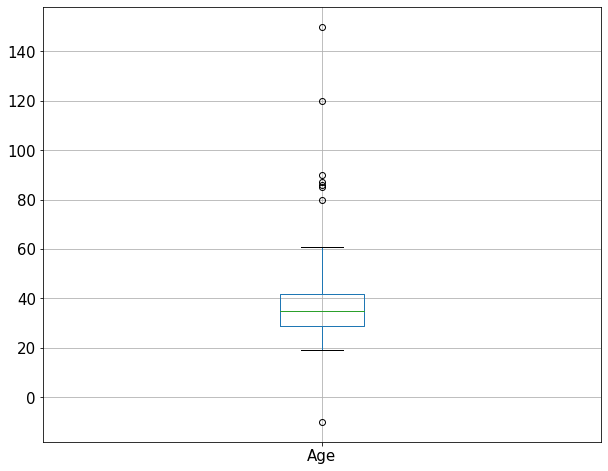

In [32]:
advertising_data.boxplot(figsize = (10, 8),
                         fontsize = 15,
                         column = ["Age"])

### Standardize the age data

This will express the data in terms of z-scores i.e. number of standard deviations away from the mean

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_age = scaler.fit_transform(advertising_data["Age"].values.reshape(-1, 1))

In [34]:
scaled_age.shape

(1000, 1)

In [35]:
advertising_data["Scaled_Age"] = scaled_age

advertising_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Scaled_Age
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,-0.133311
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,-0.513384
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,-0.988476
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,-0.703421
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,-0.133311


### Mean = 0, variance = 1

Standardized data has a mean of 0 and a variance (standard deviation) of 1

In [36]:
advertising_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Scaled_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03
mean,65.000200,36.403000,55000.000080,180.000100,0.481000,0.50000,9.248158e-17
std,15.853615,10.529552,13414.634022,43.902339,0.499889,0.50025,1.000500e+00
min,32.600000,-10.000000,13996.500000,104.780000,0.000000,0.00000,-4.409135e+00
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,-7.034207e-01
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,-1.333107e-01
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,5.318176e-01
max,91.430000,150.000000,79484.800000,269.960000,1.000000,1.00000,1.079380e+01


### Outliers could be data points which are greater than 3 standard deviations away from the mean

In [37]:
outliers = advertising_data.loc[advertising_data["Scaled_Age"] > 3]

outliers

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Scaled_Age
43,81.38,150,64929.61,212.30,Balanced dynamic application,Bowenview,0,Saint Helena,2016-02-08 00:23:38,0,10.793797
54,62.31,120,62722.57,119.30,Team-oriented encompassing portal,Amandahaven,0,Turkey,2016-02-14 07:36:58,1,7.943247
78,56.14,87,32689.04,113.53,Devolved tangible approach,Lake Edward,1,Ireland,2016-02-03 07:59:16,1,4.807642
81,73.46,90,65653.47,222.75,Innovative executive encoding,West Joseph,1,Nicaragua,2016-05-15 14:41:49,0,5.092697
83,68.94,85,30726.26,138.71,Streamlined next generation implementation,East Tylershire,0,Timor-Leste,2016-04-19 07:34:28,1,4.617606
86,77.51,80,73600.28,200.55,Total 5thgeneration encoding,North Kristine,0,Central African Republic,2016-07-01 04:41:57,0,4.142514
101,63.60,86,51864.77,235.28,Centralized logistical secured line,Youngburgh,1,Serbia,2016-06-01 09:27:34,0,4.712624


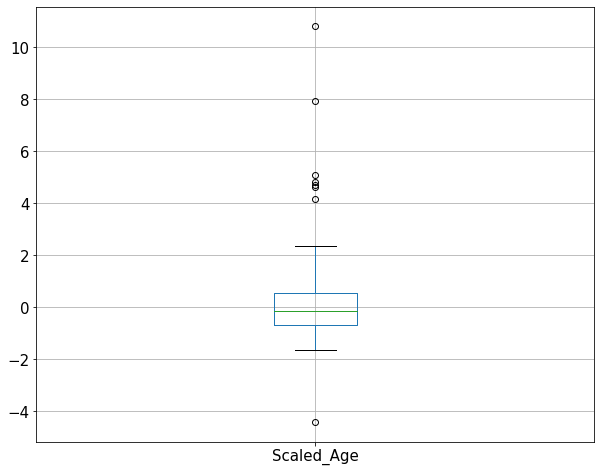

In [38]:
advertising_data.boxplot(figsize = (10, 8),
                         fontsize = 15,
                         column = ["Scaled_Age"])

In [39]:
to_drop = advertising_data[advertising_data['Age'] > 100].index

to_drop

Int64Index([43, 54], dtype='int64')

In [40]:
advertising_data = advertising_data.drop(to_drop)

advertising_data.loc[advertising_data["Age"] > 100]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Scaled_Age


In [47]:
to_drop = advertising_data[advertising_data['Age'] < 0].index

to_drop

Int64Index([], dtype='int64')

In [48]:
advertising_data = advertising_data.drop(to_drop)

advertising_data.loc[advertising_data["Age"] < -1]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Scaled_Age


### Set outlier values to the mean

If you don't want to lose the information in the records which have age between 80 and 90 you could simply set the age to the mean, this could be because you feel there is information in the other data

In [51]:
advertising_data[((advertising_data['Age'] >= 80) & (advertising_data['Age'] <= 90))] = \
    advertising_data["Age"].mean()

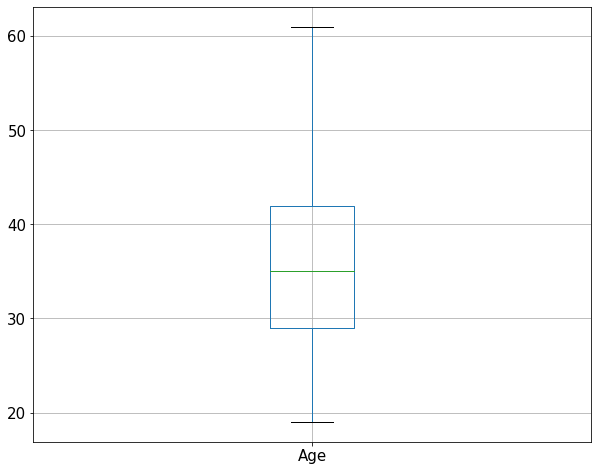

In [52]:
advertising_data.boxplot(figsize = (10, 8),
                         fontsize = 15,
                         column = ["Age"])